# Background

Notebook to extract statistics about the data that will be cited in the background section of the report.

In [51]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn.apionly as sns

plt.style.use('clean')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Read in Data

In [3]:
# read in the unprocessed data
%time df = pd.read_csv('data/yellow_tripdata_2009-01.csv')

CPU times: user 54 s, sys: 12.2 s, total: 1min 6s
Wall time: 1min 25s


In [8]:
df['Trip_Dropoff_DateTime'] = pd.to_datetime(df['Trip_Dropoff_DateTime'])
df['Trip_Pickup_DateTime'] = pd.to_datetime(df['Trip_Pickup_DateTime'])

In [9]:
df['duration'] = (df['Trip_Dropoff_DateTime'] - df['Trip_Pickup_DateTime']).dt.total_seconds()
df['weekday'] = df['Trip_Pickup_DateTime'].dt.weekday
df['hour'] = df['Trip_Pickup_DateTime'].dt.hour

## Analyze Data

In [10]:
len(df)

14092413

In [11]:
df.head()

,vendor_name,Trip_Pickup_DateTime,Trip_Dropoff_DateTime,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,Rate_Code,store_and_forward,End_Lon,...,Payment_Type,Fare_Amt,surcharge,mta_tax,Tip_Amt,Tolls_Amt,Total_Amt,duration,weekday,hour
0,VTS,2009-01-04 02:52:00,2009-01-04 03:02:00,1,2.63,-73.991957,40.721567,NaN,NaN,-73.993803,...,CASH,8.9,0.5,NaN,0.00,0.0,9.40,600.0,6,2
1,VTS,2009-01-04 03:31:00,2009-01-04 03:38:00,3,4.55,-73.982102,40.736290,NaN,NaN,-73.955850,...,Credit,12.1,0.5,NaN,2.00,0.0,14.60,420.0,6,3
2,VTS,2009-01-03 15:43:00,2009-01-03 15:57:00,5,10.35,-74.002587,40.739748,NaN,NaN,-73.869983,...,Credit,23.7,0.0,NaN,4.74,0.0,28.44,840.0,5,15
3,DDS,2009-01-01 20:52:58,2009-01-01 21:14:00,1,5.00,-73.974267,40.790955,NaN,NaN,-73.996558,...,CREDIT,14.9,0.5,NaN,3.05,0.0,18.45,1262.0,3,20
4,DDS,2009-01-24 16:18:23,2009-01-24 16:24:56,1,0.40,-74.001580,40.719382,NaN,NaN,-74.008378,...,CASH,3.7,0.0,NaN,0.00,0.0,3.70,393.0,5,16


In [24]:
hour_counts = df.groupby('hour').count()['vendor_name']

In [69]:
np.argmin(hour_counts)

5

In [68]:
np.argmax(hour_counts)

19

In [108]:
arrow_dict = {'width': 1, 
              'headwidth': 5, 
              'color': 'k'}

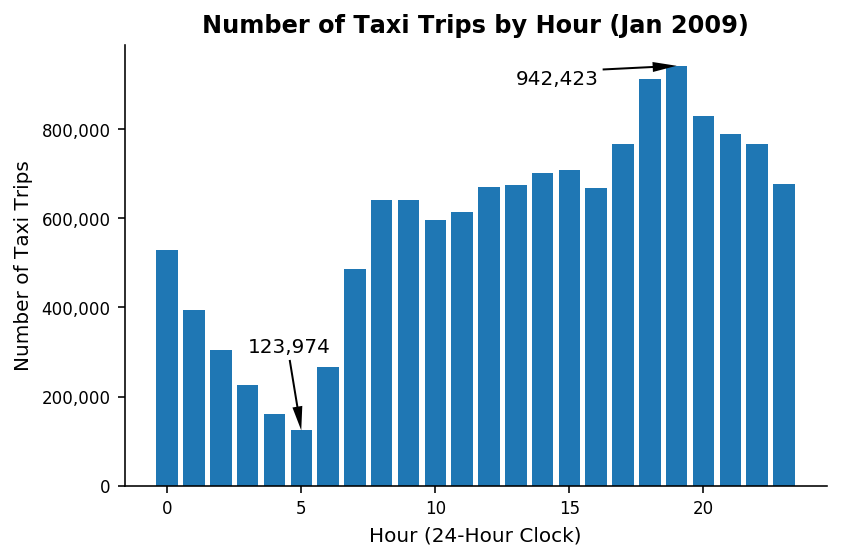

In [109]:
plt.bar(hour_counts.index, hour_counts)
sns.despine()
plt.annotate("{:,}".format(hour_counts[5]), 
             (5,hour_counts[5]), (3,3e5),
             arrowprops=arrow_dict)
plt.annotate("{:,}".format(hour_counts[19]), 
             (19,hour_counts[19]), (13,9e5),
             arrowprops=arrow_dict)

plt.gca().get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title('Number of Taxi Trips by Hour (Jan 2009)')
plt.xlabel('Hour (24-Hour Clock)')
plt.ylabel('Number of Taxi Trips')
plt.tight_layout()
plt.savefig('reports/paper/figs/ridesbyhour.pdf')

In [125]:
trip_mean = np.mean(df.duration) / 60

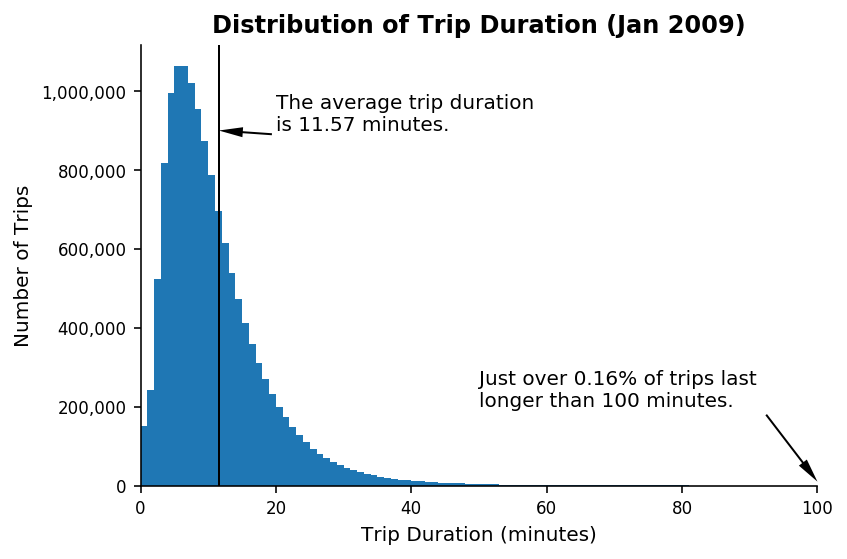

In [133]:
plt.hist(df.duration/60, bins=np.arange(0,100,1), histtype='stepfilled')
plt.title('Distribution of Trip Duration (Jan 2009)')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel("Number of Trips")
plt.gca().get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.annotate('Just over 0.16% of trips last \nlonger than 100 minutes.',
            (100,.1e5), (50,2e5),
            arrowprops=arrow_dict)
plt.annotate('The average trip duration\nis %.2f minutes.' % trip_mean,
            (trip_mean,9e5), (20,9e5),
            arrowprops=arrow_dict)
plt.axvline(trip_mean, color='k', linewidth=1, alpha=1)
plt.xlim((0,100))
sns.despine()
plt.tight_layout()
plt.savefig('reports/paper/figs/tripdurations.pdf')

In [102]:
sum(df.duration > 60*100) / len(df)

0.0016589068174485094

In [118]:
np.mean(df.duration) / 60

11.565148059928891

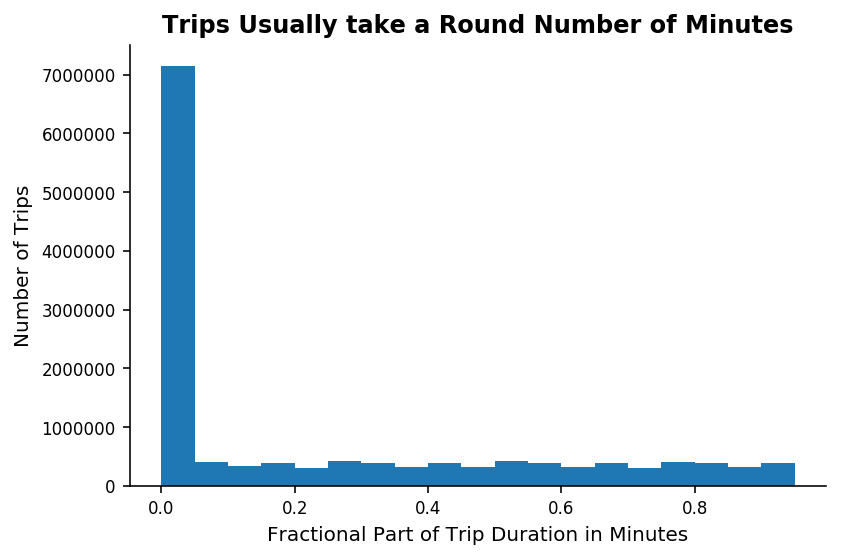

In [96]:
plt.hist(df.duration/60 - (df.duration/60).astype('int'), bins=np.arange(0,1,.05))
plt.title('Trips Usually take a Round Number of Minutes')
plt.xlabel('Fractional Part of Trip Duration in Minutes')
plt.ylabel('Number of Trips')
sns.despine()
plt.tight_layout()
plt.savefig('/Users/franciscorivera/Desktop/roundminutes.png', dpi=500)

In [32]:
sum(df.duration < 0)

175082

In [80]:
175082 / len(df)

0.0124238482082522

In [81]:
max(df.duration)

3633288.0

In [83]:
3633288 / 60 / 60 / 24

42.051944444444445